In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importando
df_pkl = pd.read_pickle("../dados/train-limpo.pkl")
df = df_pkl.copy()

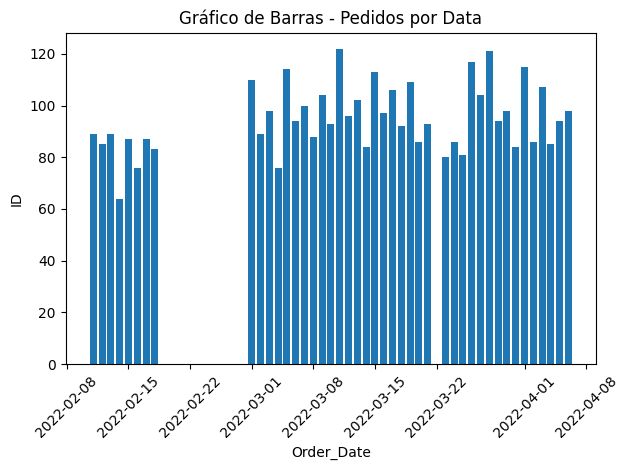

'\nBuscar entender: Porque não tem informação entre 15/02/2222 e 01/03/2022 e tem uma informação faltando antes do dia 22/03/2025\n    '

In [17]:
# Quantidade de pedidos por dia.
# Saída: Um gráfico de barra com a quantidade de entregas no eixo Y e os dias no eixo X.

df_temp = df.groupby('Order_Date')['ID'].count().reset_index()

# Gráfico
plt.bar(df_temp['Order_Date'], df_temp['ID'])

plt.xlabel('Order_Date')
plt.ylabel('ID')
plt.title('Gráfico de Barras - Pedidos por Data')
plt.xticks(rotation=45)  # gira os rótulos do eixo X para melhor leitura
plt.tight_layout()       # ajusta o layout para evitar cortes
plt.show()

"""
Buscar entender: Porque não tem informação entre 15/02/2222 e 01/03/2022 e tem uma informação faltando antes do dia 22/03/2025
    """

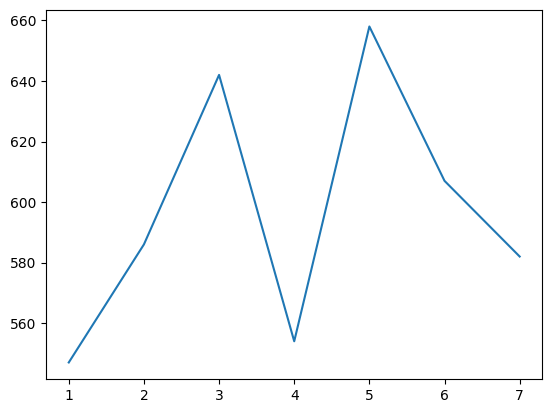

In [22]:
# Quantidade de pedidos por semana.
# Saída: Um gráfico de linhas com a quantidade de entregas no eixo Y e as semanas no eixo X

df['Semana'] = df['Order_Date'].dt.strftime('%u')
df_temp = df.loc[:,['ID','Semana']].groupby('Semana')['ID'].count().reset_index()

#  Gráfico
plt.plot(df_temp['Semana'], df_temp['ID'])

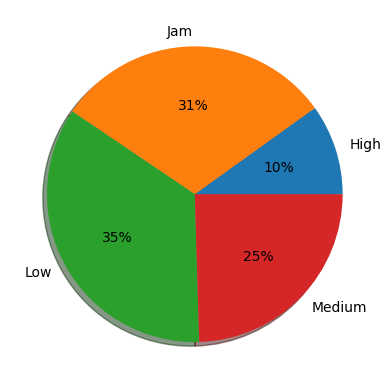

In [64]:
# Distribuição dos pedidos por tipo de tráfego.
# Saída: Um gráfico de pizza com a porcentagem dos pedidos por cada tipo de tráfego.

df_temp = df.loc[:,['ID', 'Road_traffic_density']].groupby('Road_traffic_density').count().reset_index()

# remove o na
linhas_selecionadas =  df_temp.loc[:,'Road_traffic_density'] != "NaN"
df_temp = df_temp.loc[linhas_selecionadas,:]

# calcula a porcentagem
df_temp['%'] = ((df_temp['ID']/df_temp['ID'].sum())*100).round(1)
df_temp

plt.pie(df_temp['%'], labels=df_temp['Road_traffic_density'], shadow=True, autopct='%1.f%%')
plt.show()